<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-данных-и-план-работы" data-toc-modified-id="Описание-данных-и-план-работы-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание данных и план работы</a></span></li><li><span><a href="#Загрузка-и-ознакомление-с-датасетами" data-toc-modified-id="Загрузка-и-ознакомление-с-датасетами-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузка и ознакомление с датасетами</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Подготовка-признаков-к-обучению" data-toc-modified-id="Подготовка-признаков-к-обучению-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Подготовка признаков к обучению</a></span></li><li><span><a href="#Обучение-моделей-на-обучающей-выборке" data-toc-modified-id="Обучение-моделей-на-обучающей-выборке-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Обучение моделей на обучающей выборке</a></span></li><li><span><a href="#Тестирование-моделей" data-toc-modified-id="Тестирование-моделей-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Тестирование моделей</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Отчёт-по-решению" data-toc-modified-id="Отчёт-по-решению-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Отчёт по решению</a></span></li></ul></div>

# Телеком — задача проекта

## Описание данных и план работы

Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

**Описание услуг**

Оператор предоставляет два основных типа услуг: 

1. Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
2. Интернет. Подключение может быть двух типов: через телефонную линию (DSL*,* от англ. *digital subscriber line*, «цифровая абонентская линия») или оптоволоконный кабель (*Fiber optic*).

Также доступны такие услуги:

- Интернет-безопасность: антивирус (*DeviceProtection*) и блокировка небезопасных сайтов (*OnlineSecurity*);
- Выделенная линия технической поддержки (*TechSupport*);
- Облачное хранилище файлов для резервного копирования данных (*OnlineBackup*);
- Стриминговое телевидение (*StreamingTV*) и каталог фильмов (*StreamingMovies*).

За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.

**Описание данных**

Данные состоят из файлов, полученных из разных источников:

- `contract.csv` — информация о договоре;
- `personal.csv` — персональные данные клиента;
- `internet.csv` — информация об интернет-услугах;
- `phone.csv` — информация об услугах телефонии.

Во всех файлах столбец `customerID` содержит код клиента.

Информация о договорах актуальна на 1 февраля 2020.


**План работы над проектом**

- Условие задачи, постановка задачи, описание данных 
- Загрузка и первчиное ознакомление с данными 
- Предобработка данных 
    - Проверка на дубликаты и пропуски, привидение к корректному типу данных, удаление лишних данных и тд.
    - Выделение целевого признака 
    - Объединение датасетов
- Исследовательский анализ данных
- Подготовка данных к обучению 
    - Разделение данных на обучающую и тестовую выборку 
    - Выделение признаков и целевого признака (features и target)
    - Кодирование 
    - Масштабирование 
- Обучение различных моделей на обучающей выборке и выбор наилучшей модели (данный пункт также включает в себя подбор гиперпараметров, используя кросс-валидацию)
- Обучение лучшей модели на тестовой выборке 
- Выводы по обучению, итоги проекта 

## Загрузка и ознакомление с датасетами

Импортируем библиотеки, которые нам понадобятся для нашей работы:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve

import warnings
warnings.filterwarnings('ignore')

Далее откроем наши датасеты.

In [2]:
try:
    df_contract = pd.read_csv('/datasets/final_provider/contract.csv')
    df_internet = pd.read_csv('/datasets/final_provider/internet.csv')
    df_personal = pd.read_csv('/datasets/final_provider/personal.csv')
    df_phone = pd.read_csv('/datasets/final_provider/phone.csv')

except:
    df_contract = pd.read_csv('/Users/trndn/Desktop/DataScience/projects/final_provider/contract.csv')
    df_internet = pd.read_csv('/Users/trndn/Desktop/DataScience/projects/final_provider/internet.csv')
    df_personal = pd.read_csv('/Users/trndn/Desktop/DataScience/projects/final_provider/personal.csv')
    df_phone = pd.read_csv('/Users/trndn/Desktop/DataScience/projects/final_provider/phone.csv')

pd.options.display.max_columns = None

Изучим первоначальную информацию о наших датасетах: выведем на экран первые пять строк, общую информацию о датасете и уникальные значения, которые содержат каждый столбец датасета (для этого для начала напишем отдельную функцию).

In [3]:
def unique_values(dataset):
    for column in dataset.columns:
        print('Уникальные значения столбца', column)
        print(dataset[column].sort_values().unique())


for data in [df_contract, df_internet, df_personal, df_phone]:
    display(data.head())
    data.info()
    unique_values(data)
    print('-------------------------------------------------------------------------------------------')

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB
Уникальные значения столбца customerID
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Уникальные значения столбца BeginDate
['2013-10-01' '2013-11-01' '2013-12-01' '2014-01-01' '2014-02-01'
 '2014-03-01' '2014-04-01' '2014-05-01' '2014-06-01' '2014-07-01'
 '2014-08-01' '2014-09-01' '2014-10-01' '2014-11-01' '2014-12-01'
 '2015-01-

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB
Уникальные значения столбца customerID
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Уникальные значения столбца InternetService
['DSL' 'Fiber optic']
Уникальные значения столбца OnlineSecurity
['No' 'Yes']
Уникальные значения столбца OnlineBackup
['No' 'Yes']
Уникальные значения столбца DeviceProtection
['No' 'Yes']
Уникальные значения столбца TechSu

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB
Уникальные значения столбца customerID
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Уникальные значения столбца gender
['Female' 'Male']
Уникальные значения столбца SeniorCitizen
[0 1]
Уникальные значения столбца Partner
['No' 'Yes']
Уникальные значения столбца Dependents
['No' 'Yes']
-------------------------------------------------------------------------------------------


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB
Уникальные значения столбца customerID
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-RRAMN' '9992-UJOEL'
 '9993-LHIEB']
Уникальные значения столбца MultipleLines
['No' 'Yes']
-------------------------------------------------------------------------------------------


Далее приведём написание столбцов к корректной одинаковой записи. 

In [4]:
df_contract = df_contract.rename(columns={
                                          'customerID':'customer_id', 
                                          'BeginDate':'begin_date', 
                                          'EndDate':'end_date', 
                                          'Type':'type', 
                                          'PaperlessBilling':'paperless_billing',
                                          'PaymentMethod':'payment_method',
                                          'MonthlyCharges':'monthly_charges',
                                          'TotalCharges':'total_charges'
})

df_internet = df_internet.rename(columns={'customerID':'customer_id', 
                                          'InternetService':'internet_service', 
                                          'OnlineSecurity':'online_security', 
                                          'OnlineBackup':'online_backup',
                                          'DeviceProtection':'device_protection', 
                                          'TechSupport':'tech_support', 
                                          'StreamingTV':'streaming_tv', 
                                          'StreamingMovies':'streaming_movies'                     
})

df_personal = df_personal.rename(columns={'customerID':'customer_id', 
                                          'SeniorCitizen':'senior_citizen', 
                                          'Partner':'partner', 
                                          'Dependents':'dependents'  
})

df_phone = df_phone.rename(columns={'customerID':'customer_id', 
                                    'MultipleLines':'multiple_lines'
})

Документации к данным у нас не было. Постараемся самостоятельно определить описание столбцов.

**Датасет df_contract**
- `customer_id` - код клиента
- `begin_date` - дата начала пользования услугами 
- `end_date` - дата окончания пользования услугами 
- `type` - тип договора: ежемесячный, годовой и т.д.
- `paperless_billing` - факт выставления счёта на электронную почту 
- `payment_method` - способ оплаты
- `monthly_charges` - ежемесячные траты на услуги 
- `total_charges` - всего потрачено денег на услуги

**Датасет df_internet**
- `customer_id` - код клиента 
- `internet_service` - тип подключения Интернета
- `online_security` - наличие блокировки небезопасных сайтов
- `online_backup` - наличие блачного хранилища файлов для резервного копирования данных
- `device_protection` - наличие антивируса
- `tech_support` - наличие выделенной линии технической поддержки
- `streaming_tv` - наличие стримингового телевидения
- `streaming_movies` - наличие стриминговых каталогов фильмов

**Датасет df_personal**
- `customer_id` - код клиента 
- `gender` - пол клиента 
- `senior_citizen` - наличие пенсионного статуса по возрасту 
- `partner` - наличие супруга(и)
- `dependents` - налчие иждивенцев

**Датасет df_phone**
- `customer_id` - код клиента
- `multiple_lines` - наличие возможности ведения параллельных линий во время звонка 

Изучив первоначальную информацию о датасете, мы можем отметить, что у нас есть информация о 7043 пользователях, которые пользуются услугами компании «Ниединогоразрыва.ком». Из них 5517 полузуются услугами Интернета и 6361 - стационарным телефоном. 

Также стоит отметить: вывев на экран первоначальную информацию о датасете, можно заметить, что в данных нет пропусков. 

В данной задаче нам необходимо спрогнозировать уход клиента (уйдет/не уйдёт). Отсюда следует, что будет решаться задача классификации. 

## Предобработка данных

Далее проведём предобработку данных по каждому датасету. В конце объединим их в один общий датасет по `customer_id` и выделим целевой признак. 

**df_contract**

Напишем функцию, которая будет сразу проверять датасет на наличие пропусков и дубликатов.

In [5]:
def isna_duplicate_check (data):
    print('Количество пропусков')
    print(data.isna().sum())
    print('Количество дубликатов')
    print(data.duplicated().sum())

In [6]:
isna_duplicate_check(df_contract)

Количество пропусков
customer_id          0
begin_date           0
end_date             0
type                 0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
dtype: int64
Количество дубликатов
0


Далее удалим столбец `paperless_billing`, т.к. данный признак не будет оказывать влияния на целевой. Вряд ли от способа получения чека будет зависеть уход клиента. 

In [7]:
del df_contract['paperless_billing']

Скорректируем типы данных:

In [8]:
df_contract['begin_date'] = pd.to_datetime(df_contract['begin_date'], format='%Y-%m-%d')
df_contract['total_charges'] = df_contract['total_charges'].apply(lambda x: 0 if x == ' ' else x).astype(float)

Стоит отметить, что в столбце `total_charges` есть незаполненные значения, которые мы заменили кодом выше на 0. Посмтроим, что это за строки.

In [9]:
df_contract[df_contract['total_charges'] == 0]

,customer_id,begin_date,end_date,type,payment_method,monthly_charges,total_charges
488,4472-LVYGI,2020-02-01,No,Two year,Bank transfer (automatic),52.55,0.0
753,3115-CZMZD,2020-02-01,No,Two year,Mailed check,20.25,0.0
936,5709-LVOEQ,2020-02-01,No,Two year,Mailed check,80.85,0.0
1082,4367-NUYAO,2020-02-01,No,Two year,Mailed check,25.75,0.0
1340,1371-DWPAZ,2020-02-01,No,Two year,Credit card (automatic),56.05,0.0
3331,7644-OMVMY,2020-02-01,No,Two year,Mailed check,19.85,0.0
3826,3213-VVOLG,2020-02-01,No,Two year,Mailed check,25.35,0.0
4380,2520-SGTTA,2020-02-01,No,Two year,Mailed check,20.00,0.0
5218,2923-ARZLG,2020-02-01,No,One year,Mailed check,19.70,0.0
6670,4075-WKNIU,2020-02-01,No,Two year,Mailed check,73.35,0.0


Отюсда мы видим, почему имелись пропуски в столбце `total_charges`. Информация о договорах актуальна на 1 февраля 2020. Все клиенты выше оформили договор как раз на момент 1 февраля 2020 г., поэтому информация о сумме потраченных денег на услуги отсутсвует. Вместо 0 заполним данный пропуск значением из столбца `monthly_charges`.

In [10]:
df_contract.loc[df_contract['total_charges'] == 0, 'total_charges'] = df_contract['monthly_charges']

Далее предлагается из столбца `end_date` сделать целевой признак и назвать его `exited`. Если в столбце `end_date` будет значение с датой, то это означает, что клиент перестал пользоваться услугами компании, и тогда `exited` примет значение 1. Если в `end_date` значение No - `exited` прмиет значение 0.

In [11]:
df_contract['exited'] = 1
df_contract.loc[df_contract['end_date'] == 'No', 'exited'] = 0

Поработает со столбцами `begin_date` и `end_date`. Посчитаем общее количество месяцев сколько клиент полузуется услуга на дату 1 февраля 2020г. А далее столбцы `begin_date` и `end_date` удалим. 

In [12]:
df_contract['end_date'] =df_contract['end_date'].apply(lambda x: '2020-02-01' if x == 'No' else x)

df_contract['begin_year'] = pd.DatetimeIndex(df_contract['begin_date']).year
df_contract['end_year'] = pd.DatetimeIndex(df_contract['end_date']).year
df_contract['begin_month'] = pd.DatetimeIndex(df_contract['begin_date']).month
df_contract['end_month'] = pd.DatetimeIndex(df_contract['end_date']).month

df_contract['month_used'] = (df_contract['end_year'] - df_contract['begin_year']) * 12 + (df_contract['end_month'] - df_contract['begin_month'])

df_contract = df_contract.drop(['end_date', 'begin_date', 'begin_year', 'end_year', 'begin_month', 'end_month'], axis=1)

In [13]:
df_contract.head()

,customer_id,type,payment_method,monthly_charges,total_charges,exited,month_used
0,7590-VHVEG,Month-to-month,Electronic check,29.85,29.85,0,1
1,5575-GNVDE,One year,Mailed check,56.95,1889.50,0,34
2,3668-QPYBK,Month-to-month,Mailed check,53.85,108.15,1,2
3,7795-CFOCW,One year,Bank transfer (automatic),42.30,1840.75,0,45
4,9237-HQITU,Month-to-month,Electronic check,70.70,151.65,1,2


**df_internet**

In [14]:
isna_duplicate_check(df_contract)

Количество пропусков
customer_id        0
type               0
payment_method     0
monthly_charges    0
total_charges      0
exited             0
month_used         0
dtype: int64
Количество дубликатов
0


Далее в столбцах `online_security`, `online_backup`, `device_protection`, `tech_support`, `streaming_tv`, `streaming_movies` заменим значения Yes и No на 1 и 0 соответсвенно.

In [15]:
df_internet['online_security'] = df_internet['online_security'].map({'Yes':1, 'No':0})
df_internet['online_backup'] = df_internet['online_backup'].map({'Yes':1, 'No':0})
df_internet['device_protection'] = df_internet['device_protection'].map({'Yes':1, 'No':0})
df_internet['tech_support'] = df_internet['tech_support'].map({'Yes':1, 'No':0})
df_internet['streaming_tv'] = df_internet['streaming_tv'].map({'Yes':1, 'No':0})
df_internet['streaming_movies'] = df_internet['streaming_movies'].map({'Yes':1, 'No':0})

**df_personal**

In [16]:
isna_duplicate_check(df_personal)

Количество пропусков
customer_id       0
gender            0
senior_citizen    0
partner           0
dependents        0
dtype: int64
Количество дубликатов
0


Аналогично действиям с предыдущим датасетом заменим значения Yes и No на 1 и 0 соответсвенно.

In [17]:
df_personal['partner'] = df_personal['partner'].map({'Yes':1, 'No':0})
df_personal['dependents'] = df_personal['dependents'].map({'Yes':1, 'No':0})

**df_phone**

In [18]:
isna_duplicate_check(df_personal)

Количество пропусков
customer_id       0
gender            0
senior_citizen    0
partner           0
dependents        0
dtype: int64
Количество дубликатов
0


Аналогично действиям с предыдущим датасетом заменим значения Yes и No на 1 и 0 соответсвенно.

In [19]:
df_phone['multiple_lines'] = df_phone['multiple_lines'].map({'Yes':1, 'No':0})

Данные преобработали. Теперь можно приступать к объединению таблиц по столбцу `customer_id`.

In [20]:
df = df_contract.merge(df_internet, 
                      how='left', on='customer_id').merge(df_personal, 
                      how='left', on='customer_id').merge(df_phone, 
                      how='left', on='customer_id') 

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   type               7043 non-null   object 
 2   payment_method     7043 non-null   object 
 3   monthly_charges    7043 non-null   float64
 4   total_charges      7043 non-null   float64
 5   exited             7043 non-null   int64  
 6   month_used         7043 non-null   int64  
 7   internet_service   5517 non-null   object 
 8   online_security    5517 non-null   float64
 9   online_backup      5517 non-null   float64
 10  device_protection  5517 non-null   float64
 11  tech_support       5517 non-null   float64
 12  streaming_tv       5517 non-null   float64
 13  streaming_movies   5517 non-null   float64
 14  gender             7043 non-null   object 
 15  senior_citizen     7043 non-null   int64  
 16  partner            7043 

Соедиинили наши датасеты в один общий. Появились пропуски. Они логичны, тк не все клиенты будут пользоваться обеими услугами. Поэтому наши пропуски заменим на значение 0, что означает, что клиент не использует данную услугу. Также будет логично заменить пропуски в столбце `internet_service` на значение `Do not use Internet`, тк тип данных в данной столбце - object, поэтому заменить на ноль будет не корректно. 

In [22]:
df['internet_service'] = df['internet_service'].fillna('Do not use Internet')
df = df.fillna(0)

Ниже корректировка типов данных. 

In [23]:
df['online_security'] = df['online_security'].astype(int)
df['online_backup'] = df['online_backup'].astype(int)
df['tech_support'] = df['tech_support'].astype(int)
df['device_protection'] = df['device_protection'].astype(int)
df['streaming_tv'] = df['streaming_tv'].astype(int)
df['streaming_movies'] = df['streaming_movies'].astype(int)
df['multiple_lines'] = df['multiple_lines'].astype(int)

Также для дальнейшего обучения не понадобится столбец `customer_id`. Удалим его.

In [24]:
df = df.drop('customer_id', axis=1)

Предобработка данных выполнена. Можно переходить к следующему шагу - Исследовательский анализ данных.

## Исследовательский анализ данных 

Для начала посмотрим на общий портер клиента. 

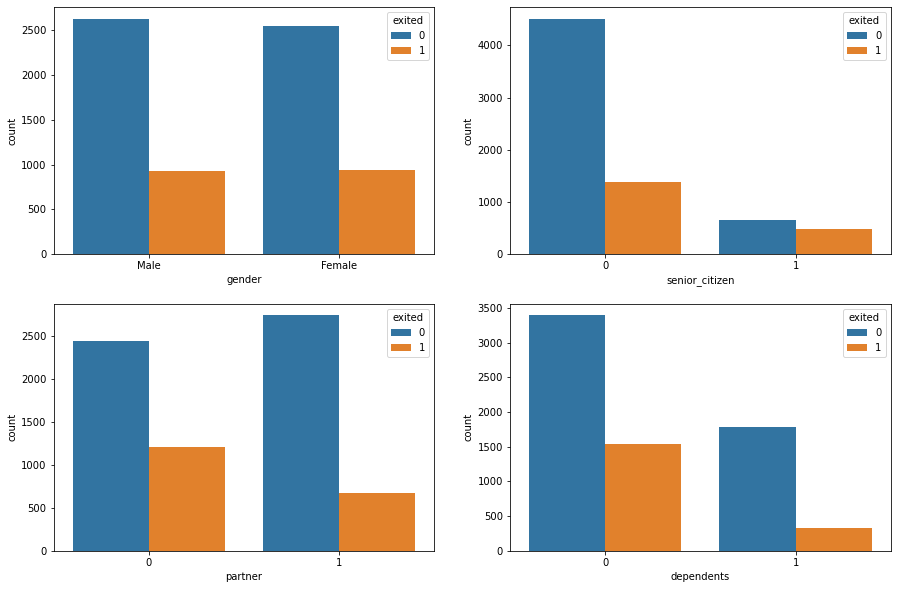

In [25]:
client_portrait = ['gender', 'senior_citizen', 'partner', 'dependents']

fig = plt.figure(figsize=(15,10)) 
for i, column in enumerate(client_portrait):
    plt.subplot(2,2,i+1)
    data = df[column].groupby(df['exited']).value_counts().rename('count').reset_index()
    sns.barplot(x=column, y='count', hue='exited', data=data)

Выведя данные диаграммы на экран, можно сделать следующий выводы:
- не прослеживается зависимость по гендерной принадлежности. Также можно отметить, что в выборке почти равное количество мужчин и женщин 
- касательно возраста клиентов: клиентов, не достигших пенсионного возраста больше (около 6 тыс.)
- также почти в равном количестве клиенты имеющие и не имеющие супруга(и). Клиенты, не имеющие партнёра, чаще расторгают догвор об оказании услуг
- Клиентов, не имеющих иждивенцев больше (их около 5000). Также эта категория чаще расторгает договор.

Далее посмотим на зависимости от типа договора и методов оплаты.

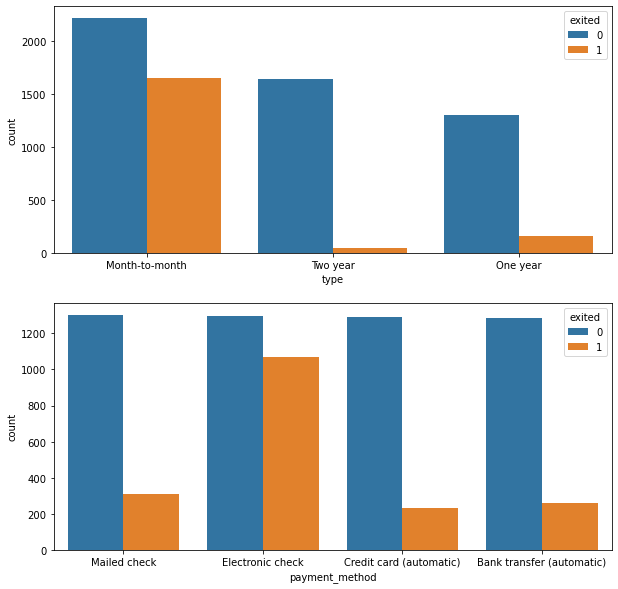

In [26]:
contract = ['type', 'payment_method']

fig = plt.figure(figsize=(10,10)) 
for i, column in enumerate(contract):
    plt.subplot(2,1,i+1)
    data = df[column].groupby(df['exited']).value_counts().rename('count').reset_index()
    sns.barplot(x=column, y='count', hue='exited', data=data)

Здесь можно сделать следующие выводы:
- Больше всего клиентов с помесячной оплатой услуг (~ 4000)
- Клиенты с помесячной оплатой услуг чаще расторгают договор. Вероятнее всего, клиенты, заключающие договор на 1 год и более удовлетворены сервисом компании и уверены в ней.
- У клиентов предпочтительный метод оплаты - электронный чек (~2500). Но клиенты, относящиеся к данной категории, больше прерывают договор.

Следующим шагом посмотрим на графики дополнительных услуг:

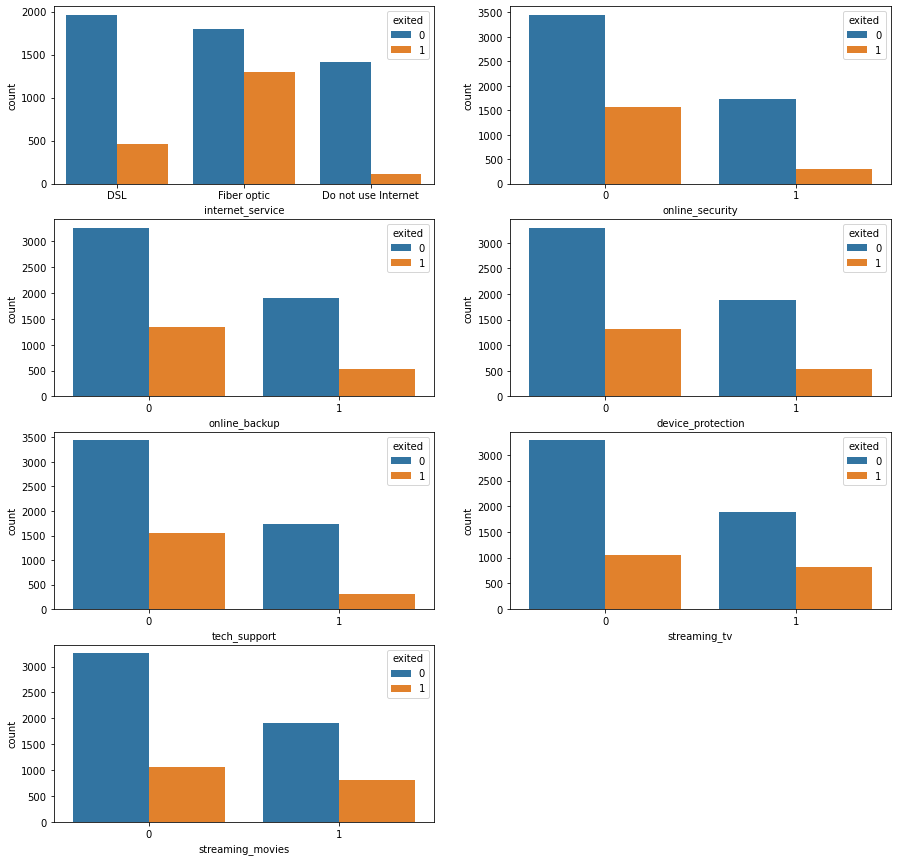

In [27]:
internet = ['internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies']

fig = plt.figure(figsize=(15,15)) 
for i, column in enumerate(internet):
    plt.subplot(4,2,i+1)
    data = df[column].groupby(df['exited']).value_counts().rename('count').reset_index()
    sns.barplot(x=column, y='count', hue='exited', data=data)

По данным графикам можно сделать следующие выводы:
- Клиенты больше предпочитают подключение к Интернету с помощью оптоволоконного кабеля. Но здесь также стоит отметить, что отток клиентов, использующих данный тип подключения больше, нежели через телефонную линию.
- Если смотреть про дополнительные услуги, то прмиерно равное количество клиентов используют каждый вид дополнительной услуги.
- Чаще всего отказываются от услуг компании клиенты, дополнительно подключившие услуги стримингового ТВ и киносервиса. 

Далее посмотрим на распределения оплат и периода пользования услугами компании. Построим гистограммы и ящики с усами.

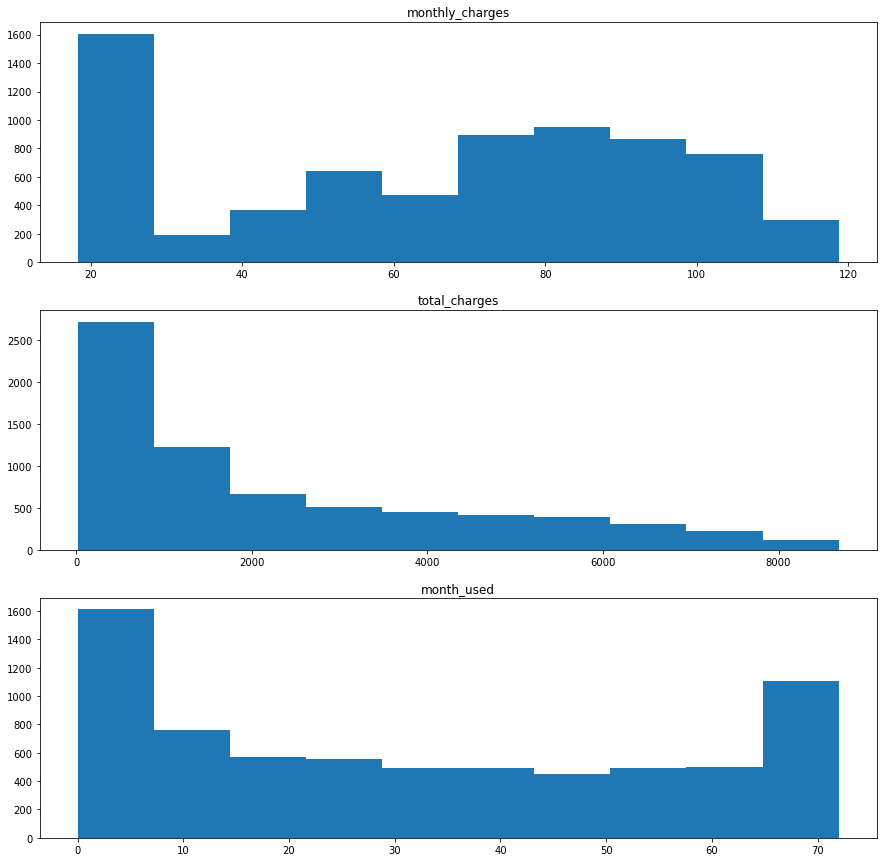

In [28]:
numeric = ['monthly_charges', 'total_charges', 'month_used']

fig = plt.figure(figsize=(15,15)) 
for i, column in enumerate(numeric):
    plt.subplot(3,1,i+1)
    plt.hist(df[column])
    plt.title(column)

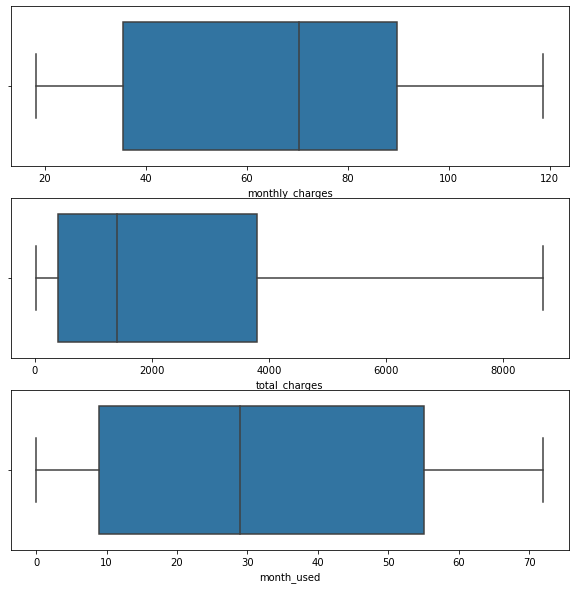

In [29]:
fig = plt.figure(figsize=(10, 10)) 
for i, column in enumerate(numeric):
    plt.subplot(3,1,i+1)
    sns.boxplot(df[column])

По результатам вывода данных графиков можно сделать следующие выводы:
- Половина клиентов пользователей в месяц платят по тарифу от 40 до 90 д.е. за услуги. Здесь же отметим, что около 1500 клиентов платят по тарифу в месяц 20-25 д.е. Скорее всего, это люди, не подключившие никакие дополнительные услуги. 
- Говоря про длиетнльность пользования услугами компании, можно сказать, что в среднем срок договора составляет от 10 до 55 месяцев. Также примерно 1600 человек пользовались услугами около полугода, а далее контракт был расторгнут. Скоре всего, это можно объяснить тем, что клиенты могли быть не довольны услугами компании или нашли более подходящие/выгодные для них условия в других фирмах.
- В среднем общие выплаты за весь период использования составляет примерно 400 - 3800 д.е. 

Далее проверим наши количественные признаки на корреляцию.

In [30]:
df[numeric].corr()

,monthly_charges,total_charges,month_used
monthly_charges,1.000000,0.651182,0.247900
total_charges,0.651182,1.000000,0.826164
month_used,0.247900,0.826164,1.000000


По результатам проверки, можно отметить, что коэффициент корреляции высок у признаков `total_charges` и `month_used`. Это легко объяснить тем, что от продолжительности пользования зависит общая сумма выплат: тем больше используешь, тем больше заплатил. 

Поэтому следующим шагом удалим признак `total_charges`.

In [31]:
df = df.drop('total_charges', axis=1)

## Подготовка признаков к обучению

Для обучения будем использовать следующие модели:
- Логистическая регрессия (LogisticRegression)
- LightGBM
- CatBoost

Выбраны следующие метрики качества модели:
- AUC-ROC (основная)
- Accuracy (вспомогательная)

Но для начала надо подготовить наш датасет к обучению.

Сперва проверим целевой признак на баланс.

In [32]:
df['exited'].value_counts(normalize=True)

0    0.73463
1    0.26537
Name: exited, dtype: float64

Явно присутствует дисбаланс классов (3:4). Далее при обучении моделей будем указывать аргумент `class_weight = 'balanced'`

Как известно LightGBM и Catboost работают с категориальными признаками, а вот для LogisticRegression требуется кодирование и стандартизация. 

In [33]:
df_ohe = pd.get_dummies(df, drop_first=True)

Разделим наши данные на признаки и целевой признак. Целевым признаком будет `exited`.

In [34]:
target = df['exited']
features = df.drop(['exited'], axis=1)

target_ohe = df_ohe['exited']
features_ohe = df_ohe.drop(['exited'], axis=1)

features_train, features_test, target_train, target_test = train_test_split(features, 
                                                                             target, 
                                                                             test_size=0.25, 
                                                                             random_state=250722)

features_train_ohe, features_test_ohe, target_train_ohe, target_test_ohe = train_test_split(features_ohe, 
                                                                             target_ohe, 
                                                                             test_size=0.25, 
                                                                             random_state=250722)

Т.к. в данных присутствуют количественные признаки с разными разбросами значений, то следует привести эти признаки к одному масштабу. Один из методов масштабирования - стандартизация данных. Применем его.

In [35]:
numeric = ['monthly_charges', 'month_used']

scaler = StandardScaler()
scaler.fit(features_train_ohe[numeric])

features_train_ohe[numeric] = scaler.transform(features_train_ohe[numeric])
features_test_ohe[numeric] = scaler.transform(features_test_ohe[numeric])

pd.options.mode.chained_assignment = None

Данные подготовлены. Можно приступать к обучению моделей. 

## Обучение моделей на обучающей выборке 

**LogisticRegression**

In [36]:
%%time

param_grid = {'C': [0.1,1,10,100],
              'solver':['liblinear', 'lbfgs'],
              'max_iter': range(50, 200, 50)
}

model = LogisticRegression(random_state=250722, class_weight='balanced')
lr = GridSearchCV(model, param_grid, scoring = 'roc_auc', cv = 5)
lr.fit(features_train_ohe, target_train_ohe)

predictions_train = lr.predict(features_train_ohe)
probabilities_train = lr.predict_proba(features_train_ohe)
probabilities_one_train = probabilities_train[:, 1]

auc_roc = roc_auc_score(target_train_ohe, probabilities_one_train)
accuracy = accuracy_score(target_train_ohe, predictions_train)

print(lr.best_params_)
print('AUC-ROC:', auc_roc)
print('Accuracy:', accuracy)

{'C': 100, 'max_iter': 50, 'solver': 'liblinear'}
AUC-ROC: 0.8449352690346403
Accuracy: 0.7464975388110564
CPU times: user 7.37 s, sys: 75.3 ms, total: 7.44 s
Wall time: 1.88 s


**CatBoost**

In [37]:
categorical = ['type', 'payment_method', 'internet_service', 'gender']

In [38]:
%%time

param_grid = {
    'learning_rate': [0.1, 0.2, 0.3],
    'iterations': range(100, 600, 100),
    'max_depth': range(5, 9)
}

model = CatBoostClassifier(random_state=250722, verbose=False, class_weights = [0.73463,0.26537], cat_features=categorical)
cat = GridSearchCV(model, param_grid, scoring='roc_auc', cv=5)
cat.fit(features_train, target_train)

predictions_train = cat.predict(features_train)
probabilities_train = cat.predict_proba(features_train)
probabilities_one_train = probabilities_train[:, 1]

auc_roc = roc_auc_score(target_train, probabilities_one_train)
accuracy = accuracy_score(target_train, predictions_train)

print(cat.best_params_)
print('AUC-ROC:', auc_roc)
print('Accuracy:', accuracy)

{'iterations': 200, 'learning_rate': 0.1, 'max_depth': 5}
AUC-ROC: 0.875628901441885
Accuracy: 0.7822794396062097
CPU times: user 23min 55s, sys: 1min 22s, total: 25min 17s
Wall time: 5min 52s


**LightGBM**

In [39]:
features_train[categorical] = features_train[categorical].astype('category')
features_test[categorical] = features_test[categorical].astype('category')

In [40]:
%%time

param_grid = {'num_leaves':range(13, 100, 13), 
              'max_depth': range(5, 9),
              'learning_rate':[0.1,0.3],
              'n_estimators': range(20, 60, 10),
              'reg_alpha':[0,0.01,0.03]}

model = LGBMClassifier(random_state=250722, class_weight = 'balanced')

lgbm = GridSearchCV(model, param_grid, scoring='roc_auc', cv=5)
lgbm.fit(features_train, target_train)

predictions_train = lgbm.predict(features_train)
probabilities_train = lgbm.predict_proba(features_train)
probabilities_one_train = probabilities_train[:, 1]

auc_roc = roc_auc_score(target_train, probabilities_one_train)
accuracy = accuracy_score(target_train, predictions_train)

print(lgbm.best_params_)
print('AUC-ROC:', auc_roc)
print('Accuracy:', accuracy)

{'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 50, 'num_leaves': 13, 'reg_alpha': 0}
AUC-ROC: 0.8770482569896255
Accuracy: 0.7781143506247633
CPU times: user 16min 9s, sys: 7.53 s, total: 16min 17s
Wall time: 2min 3s


В результате обучения трёх моделей (LogisticRegression, CatBoost и LightGBM) мы получили следующие результаты:

|                   |AUC-ROC|Accuracy|
|:------------------|:-----:|:------:|
| LogisticRegression|0.8449 |0.7665  |
| CatBoost          |0.8756 |0.7823  |
| LightGBM          |0.8770 |0.7781  |

Лучше всего себя показали модели градиентного бустинга. 

Далее помотрим, что покажут эти модели на тестовой выборке. 

## Тестирование моделей

**LogisticRegression**

In [41]:
predictions_test = lr.predict(features_test_ohe)
probabilities_test = lr.predict_proba(features_test_ohe)
probabilities_one_test = probabilities_test[:, 1]

auc_roc = roc_auc_score(target_test_ohe, probabilities_one_test)
accuracy = accuracy_score(target_test_ohe, predictions_test)

print('AUC-ROC:', auc_roc)
print('Accuracy:', accuracy)

AUC-ROC: 0.8439563400031459
Accuracy: 0.7450312322544009


**CatBoost**

In [42]:
predictions_test = cat.predict(features_test)
probabilities_test = cat.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

auc_roc = roc_auc_score(target_test, probabilities_one_test)
accuracy = accuracy_score(target_test, predictions_test)

print('AUC-ROC:', auc_roc)
print('Accuracy:', accuracy)

AUC-ROC: 0.8531051608217959
Accuracy: 0.787052810902896


**LightGBM**

In [43]:
predictions_test = lgbm.predict(features_test)
probabilities_test = lgbm.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

auc_roc = roc_auc_score(target_test, probabilities_one_test)
accuracy = accuracy_score(target_test, predictions_test)

print('AUC-ROC:', auc_roc)
print('Accuracy:', accuracy)

AUC-ROC: 0.8506554354119187
Accuracy: 0.7541169789892107


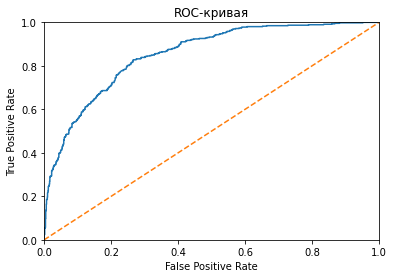

In [44]:
probabilities_test_cat = cat.predict_proba(features_test)
fpr, tpr, thresholds = roc_curve(target_test, probabilities_test_cat[:, 1])

plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

Выше построили график ROC-AUC. В результате мы видим, что наша модель показала себя намного лучше, чем случайно построенная.

## Вывод

Было проведено исследование по прогнозированию расторгнет ли клиент договор с телеком компанией. 

В нашем распоряжении была информация о 7043 клиентах. Из них 5517 полузуются услугами Интернета и 6361 - стационарным телефоном.

Перед началом обучения мы подготовили и исследовали наши данные. Это являлось важным этапом, тк от этого завсит качество модели. Также было важно было не допустить утчеки данных. 

После данных этапов, прситупили к подготовке данных для обучения: проверили целевой признак на дисбаланс, выделили целевой признак, разделили выборку на обучающую и тестовую, кодировали и масштабировали данные.

Для обучения были выбраны три модели: логистическая регрессия и модели градиентного бустинга (CatBoost и LightGBM). Основной метрикой качества модели была выбрана AUC-ROC, accuracy взяли как вспомогательную. В итоге обучения и подбора гиперпараметров лучшие результаты показали модели градиентного бустинга.

Далее протестирлвали модели на тестовой выборке. Лучший результат отмечается у модели CatBoost:

|        |AUC-ROC|Accuracy|
|:-------|:-----:|:------:|
|CatBoost|0.8531 |0.7870  |

## Отчёт по решению

Было проведено исследование для телеком-компании. Данный проект заключался в том, чтобы спрогнозировать, расторгнет ли клиент договор с компанией. 

1.Для начала были описаны исходящие данные, услуги компании. Здесь же была поставлена задача нашего проекта. Далее составили план проекта, которого далее придерживались в ходе исследования.

2.Следующим шагом загрузили данные, ознакомились с ними (посмотрели на первые 5 строк датасета, вывели на экран первичную информацию о данных, посмотрели на возможные значения, которые могут принимать признаки). Далее поработали со столбцами: привели их названия к корректному написаю и дали им описание, тк документаци у нас не было. После сделали вывод о том, с чем нам предстоит работать: у нас есть информация о 7043 пользователях, которые пользуются услугами компании «Ниединогоразрыва.ком». Из них 5517 полузуются услугами Интернета и 6361 - стационарным телефоном. Здесь же определили, что будет решаться задача бинарной классификации.

3.Получив первоначальную информацию о датасете, приступили к предобработке. В начале предобработка отдельно по каждому из 4 датасетов:
- `df_contract`: проверили датасет на пропуски и дубликаты. Удалили столбец `paperless_billing`, тк посчитали, что вряд ли от способа получения чека будет зависеть уход клиента. Затем скорректировали типы данных в столбцах `begin_date` и `total_charges`. В последнем были замечены пустые значения. Оказалось, что пустые значения были у клиентов, которые начали пользоваться услугами на момент выгрзуки данных, те не прошёл меясц с момента оформления договора. Пустые значения в столбце `total_charges` заменили на значения ежемесячной платы. Следующим шагом сделали из столбца `end_date` целевой признак, обозначив его `exited`(если в `end_date` была дата, то `exited` принимало значения 1, No - 0). Далее посчитали кол-во месяцев сколько клиент пользуется/пользовался услгами компании. Тем самым столбцы `end_date` и `begin_date` перестали быть необходимыми.
- `df_internet`: проверили датасет на пропуски и дубликаты. Далее в столбцах `online_security`, `online_backup`, `device_protection`, `tech_support`, `streaming_tv`, `streaming_movies` заменили значения Yes и No на 1 и 0 соответсвенно.
- `df_contract`: проверили датасет на пропуски и дубликаты. Далее в столбцах `partner`, `dependets` заменили значения Yes и No на 1 и 0 соответсвенно.
- `df_phone`: проверили датасет на пропуски и дубликаты. Далее в столбце `multiple_lines` заменили значения Yes и No на 1 и 0 соответсвенно.

Далее объединили 4 датасета в один общий методом merge по столбцу `customer_id`. После объединения подкорректировали типы данных, где это было необходимо. В конце данного пункта удалили столбец `customer_id`, тк для обучения модели он не понадобится. 

4.После предобработки данных провели исследовательский анализ данных. 

Сначала изучили общий портер клиента. Получили:
- не прослеживается зависимость по гендерной принадлежности. Также можно отметить, что в выборке почти равное количество мужчин и женщин 
- касательно возраста клиентов: клиентов, не достигших пенсионного возраста больше (около 6 тыс.)
- также почти в равном количестве клиенты имеющие и не имеющие супруга(и). Клиенты, не имеющие партнёра, чаще расторгают догвор об оказании услуг
- Клиентов, не имеющих иждивенцев больше (их около 5000). Также эта категория чаще расторгает договор.

Следующим шагом исследовали зависимости от типа договора и методов оплаты. В итоге получили следующее:
- Больше всего клиентов с помесячной оплатой услуг (~ 4000)
- Клиенты с помесячной оплатой услуг чаще расторгают договор. Вероятнее всего, клиенты, заключающие договор на 1 год и более удовлетворены сервисом компании и уверены в ней.
- У клиентов предпочтительный метод оплаты - электронный чек (~2500). Но клиенты, относящиеся к данной категории, больше прерывают договор.

Далее изучили поведение клиентоа относительно дополнительныз услуг. Результатом стало следующее:
- Клиенты больше предпочитают подключение к Интернету с помощью оптоволоконного кабеля. Но здесь также стоит отметить, что отток клиентов, использующих данный тип подключения больше, нежели через телефонную линию.
- Если смотреть про дополнительные услуги, то прмиерно равное количество клиентов используют каждый вид дополнительной услуги.
- Чаще всего отказываются от услуг компании клиенты, дополнительно подключившие услуги стримингового ТВ и киносервиса. 

Далее посмотрели на распределения оплат и периода пользования услугами компании. Построили гистограммы и ящики с усами. По результатам вывода данных графиков можно сделать следующие выводы:
- Половина клиентов пользователей в месяц платят по тарифу от 40 до 90 д.е. за услуги. Здесь же отметим, что около 1500 клиентов платят по тарифу в месяц 20-25 д.е. Скорее всего, это люди, не подключившие никакие дополнительные услуги. 
- Говоря про длиетнльность пользования услугами компании, можно сказать, что в среднем срок договора составляет от 10 до 55 месяцев. Также примерно 1600 человек пользовались услугами около полугода, а далее контракт был расторгнут. Скоре всего, это можно объяснить тем, что клиенты могли быть не довольны услугами компании или нашли более подходящие/выгодные для них условия в других фирмах.
- В среднем общие выплаты за весь период использования составляет примерно 400 - 3800 д.е.

Далее проверили количественные признаки на мултиколлинеарность. В резьутате получили, что признаки `total_charges` и `month_used` сильно коррелируют между собой. Это легко объяснить тем, что от продолжительности пользования зависит общая сумма выплат: тем больше используешь, тем больше заплатил. Поэтому следующим шагом удалили признак `total_charges`. Данный шаг был очень важен, тк если упустить его, то можно допустить утчеки данных, которая могла в дальнейшем повлиять на качество модели.

5.Далее приступили к подготовке наших данных к обучению. В начале проверили наш целевой признак `exited` на баланс. В итоге у нас имелся дсбаланс признаков (~ 3:4). Поэтому далее при обучении моделей будем указывать аргумент class_weight = 'balanced'. Далее закодировали нашу выборку, используя метод One-Hot Encoding. Следующим шагом разделили нашу выборку на обучающую и тестовую в соотношении 3:4. Т.к. в данных присутствуют количественные признаки с разными разбросами значений, то следом привели эти признаки к одному масштабу. Использовали один из методов масштабирования - стандартизация данных.

6.После всех манипуляций с данными приступили к обучению моделей на обучающей выборке. Были выбраны три модели: LogisticRegression и две модели градиентного спуска - CatBoost и LightGBM. Основной метрикой качества модели была выбрана AUC-ROC. Accuracy была выбрана как вспомогательная. При обучении моделей был произведён подбор гиперпараметров с помощью GridSearchCV, который также включает в себя кросс-валидацию. 

В результате обучения трёх моделей (LogisticRegression, CatBoost и LightGBM) мы получили следующие результаты:

|                   |AUC-ROC|Accuracy|
|:------------------|:-----:|:------:|
| LogisticRegression|0.8449 |0.7665  |
| CatBoost          |0.8756 |0.7823  |
| LightGBM          |0.8770 |0.7781  |

Лучше всего себя показали модели градиентного бустинга. 

7.Затем перешли к тестированию моделей. В итоге лучший результат показала модель градиентного спуска CatBoost

|        |AUC-ROC|Accuracy|
|:-------|:-----:|:------:|
|CatBoost|0.8531 |0.7870  |

Также построили график ROC-AUC, в результате которого мы видим, что наша модель показала себя намного лучше, чем случайно построенная.

Поставленная задача выполнена. В ходе выполнения данного проекта придерживались первоначального плана работы, пункты которого в итоге все были выполнены. 